In [1]:
#本章需导入的模块
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_validate,train_test_split
from sklearn import neighbors,preprocessing

Text(0.5, 1.0, '加权K-近邻的测试精度(1-测试误差)变化折线图\n(最优参数K=11)')

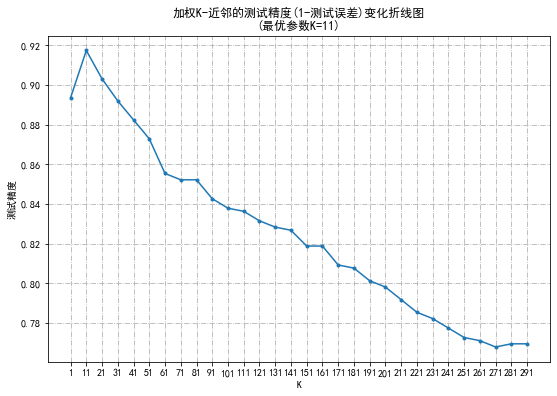

In [ ]:
data=pd.read_excel('北京市空气质量数据.xlsx')
data=data.replace(0,np.NaN)
data=data.dropna()
X=data.loc[:,['PM2.5','PM10','SO2','CO','NO2','O3']]
Y=data.loc[:,'质量等级']

testPre=[]
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=123) 
Ntrain=len(Y_train)
K=np.arange(1,int(Ntrain*0.20),10)
for k in K:
    modelKNN=neighbors.KNeighborsClassifier(n_neighbors=k,weights='distance')
    modelKNN.fit(X_train,Y_train)
    testPre.append(modelKNN.score(X_test,Y_test))
plt.figure(figsize=(9,6))
plt.grid(True, linestyle='-.')
plt.xticks(K)
plt.plot(K,testPre,marker='.')
plt.xlabel("K")
plt.ylabel("测试精度")
plt.title("加权K-近邻的测试精度(1-测试误差)变化折线图\n(最优参数K=%d)"%(K[testPre.index(np.max(testPre))]))

说明：利用北京市空气质量监测数据，采用K-近邻法对空气质量等级进行预测。
1、采用加权K-近邻法，采用倒数加权。
2、应依据训练误差确定K-近邻法关键参数K，这里采用旁置法计算。指定训练集占70%，测试集占30%。
3、K-近邻参数K的取值范围，从1-近邻开始，每次增加10个步长。指定近邻占比率为20%，K的最大取值为样本量的20%，这里为291。
4、从右向左观察精度曲线。随近邻个数K从最大值291开始逐步减少，模型复杂度不断增加，测试精度呈先上升后下降，也即测试误差呈先下降后上升的形态。当K=11时测试精度最高，测试误差最小。K小于11后测试精度下降误差上升，表明出现了模型过拟合。因此参数K不能小于11，最优值应设置为11。